# Simulations with the (Numpy) random library

Numpy has an important and useful random library. We will discover its basic features to discover some link between basic distributions.

## I Basic distributions

We will first discover how to use individual basic (discrete) distributions to get some familiarity with the library.

We begin by understanding how to obtain samplings following the uniform (discrete) distribution, how to obtain a Bernoulli distribution from it, then how to use the binomial, Poisson, and geometric distributions

In [1]:
import numpy as np

np.random.randint(0, 2, 10) # Complete according to the documentation to understand the behaviour of this method

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0])

In [2]:
# Repeat the same procedure with the following distributions
# https://numpy.org/doc/1.16/reference/routines.random.html for help

np.random.binomial(10, 0.2)
# np.random.poisson ...
# np.random.geometric ...

1

## Links between distributions

We have seen that the binomial distribution derives from Bernoulli experiments. The relation is simple enough to use it as an exemple that we will reproduce with the geometric and Poisson distributions.

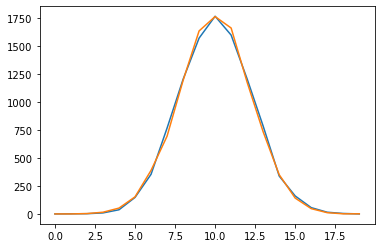

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# We will on one side simulate 20 coin flips counting the head
# and compare it to direct calls of the binomial method
N = 20
# We initialize 2 lookup tables to 0, storing the outcomes from the loop below
counter_for_sum = np.zeros(N)
counter_for_binomial = np.zeros(N)

# We repeat a large number of experiments to obtain an estimate of 
# both probability distributions
for _ in range(10000):

    n = np.sum(np.random.randint(0, 2, N)) # sum of coin flip case
    m = np.random.binomial(N,0.5) # direct call
    
    counter_for_sum[n] += 1
    counter_for_binomial[m] += 1
    
# Pyplot is used to plot the results
plt.plot(counter_for_sum)
plt.plot(counter_for_binomial)

**To do : repeat the same procedure to obtain a comparison with the geometric distribution from individual coin flips** 

You may have to adjust the size of the lookup table. An alternative is to use histograms

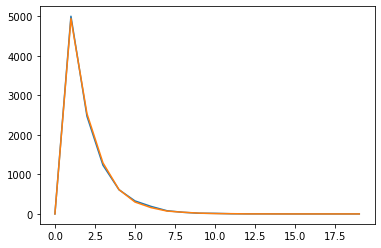

In [4]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

# Changer les commentaires

# We will on one side simulate 20 coin flips counting the head
# and compare it to direct calls of the binomial method
N = 20
# We initialize 2 lookup tables to 0, storing the outcomes from the loop below
counter_for_first = np.zeros(N)
counter_for_geometric = np.zeros(N)

# We repeat a large number of experiments to obtain an estimate of 
# both probability distributions
for _ in range(10000):
    
    counter = 1
    while(np.random.randint(0,2)):
        counter += 1

    m = np.random.geometric(0.5) # direct call
    
    counter_for_first[counter] += 1
    counter_for_geometric[m] += 1
    
# Pyplot is used to plot the results
plt.plot(counter_for_first)
plt.plot(counter_for_geometric)

**The Poisson distribution is trickier. You will have to find a relationship between its lambda coefficient and the n,p parameters of the binomial distribution.** Proceed by trial :
1) Reproduce the preceding experimental procedure to obtain an attempt to mimic the binomial with the Poisson distribution
2) Tune lambda, n and p to obtain curves that aggrees
3) Deduce in what cases the Poisson distribution approximate the binomial

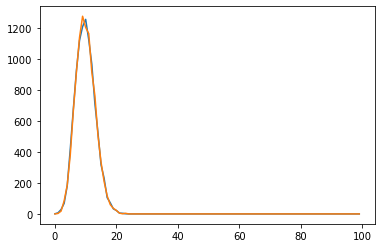

In [5]:
# Rectifier les commentaires

import numpy as np
import matplotlib.pyplot as plt

# We will on one side simulate 20 coin flips counting the head
# and compare it to direct calls of the binomial method
N = 2000
p = 0.005
lambdaa = 10

# We initialize 2 lookup tables to 0, storing the outcomes from the loop below
counter_for_binomial = np.zeros(100)
counter_for_poisson = np.zeros(100)

# We repeat a large number of experiments to obtain an estimate of 
# both probability distributions
for _ in range(10000):

    m = np.random.binomial(N,p) # direct call
    n = np.random.poisson(lambdaa)
    
    counter_for_binomial[m] += 1
    counter_for_poisson[n] += 1
    
# Pyplot is used to plot the results
plt.plot(counter_for_binomial[:200])
plt.plot(counter_for_poisson[:200])

## Numerical simulations with the random library

We can use the random library to perform simulations.

***Exemple :*** A company host a large quantity of websites. One of them cost them monthly 1000€. This website has approximately 100,000 visitors by months, and each of them pay a 1€ subscription with a 0.01 probability. The situation seems equilibrated, but we want to evaluate the risks of bankrupt from fluctuations.

The company has a 500€ security account, and add the benefice to it.

In [6]:
import numpy as np
# We want to see if we can survive more than 48 months
Limit = 48
counter = 0 # to exit the loop if we are safe
safety = 500

# we loop over the months
while(safety > 0):
    n = np.random.poisson(1000) # Nombre de visiteurs ayant payé ce mois
    
    safety += n - 1000
    counter += 1
    if (counter >= Limit):
        print("We seem to be safe this time :")
        print(safety)
        break
    
if(safety < 0):
    print(f"Bankrupt : {safety}" )

We seem to be safe this time :
858


**Exercise: A website receive an average of 5,000 daily visitors, but the servers tend to lag when there is more than 5,100 visitors. Find the probability that it lags.**



In [7]:
limite = 5100
compteur = 0
N_tours = 10000

for _ in range(N_tours):
    today = np.random.poisson(5000)

    if(today >= limite):
        compteur += 1
    
print(compteur/N_tours)

0.079


## Normal distribution

La loi normale apparaît extrêmement souvent en conséquence de la loi des grands nombres. Si une famille de variable $(X_i)_i$ est indépendante et identiquement distribuée, alors la moyenne $\frac{1}{n} \sum\limits_{i =1}^n X_i$ tend vers une lois normale d'espérance $\bar{X}$ et de variance Var(X).

En conséquence, lorsque l'on répète une expérience aléatoire un grand nombre N de fois, les résultats moyens possibles se distribuent de façon plus en plus proche vers une lois normale.

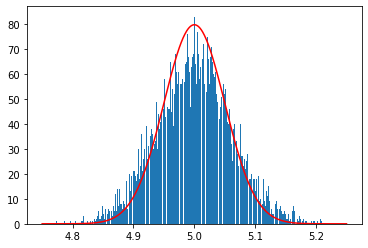

In [20]:
resultats = []

for _ in range(10000):
    n = np.random.binomial(20, 0.25, 1000)
    resultats.append(np.average(n))
    
plt.hist(resultats, bins = 500)
X = np.linspace(4.75, 5.25, 500)
m = 5
sigma = 0.05
gauss = lambda x : np.sqrt(0.5/np.pi) * np.exp(-0.5*(x - m)**2/sigma**2)
plt.plot(X, 200*gauss(X), c= 'r')
plt.show()

In [56]:
resultats

[5.07]